In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
## loading the data set 
glass = pd.read_csv(r"C:\Users\ADMIN\assignment\assignment 13 knn.inc\glass.csv")
glass.head(9)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1


<Axes: ylabel='RI'>

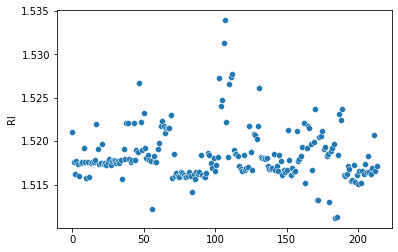

In [4]:
sns.scatterplot(glass.RI)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


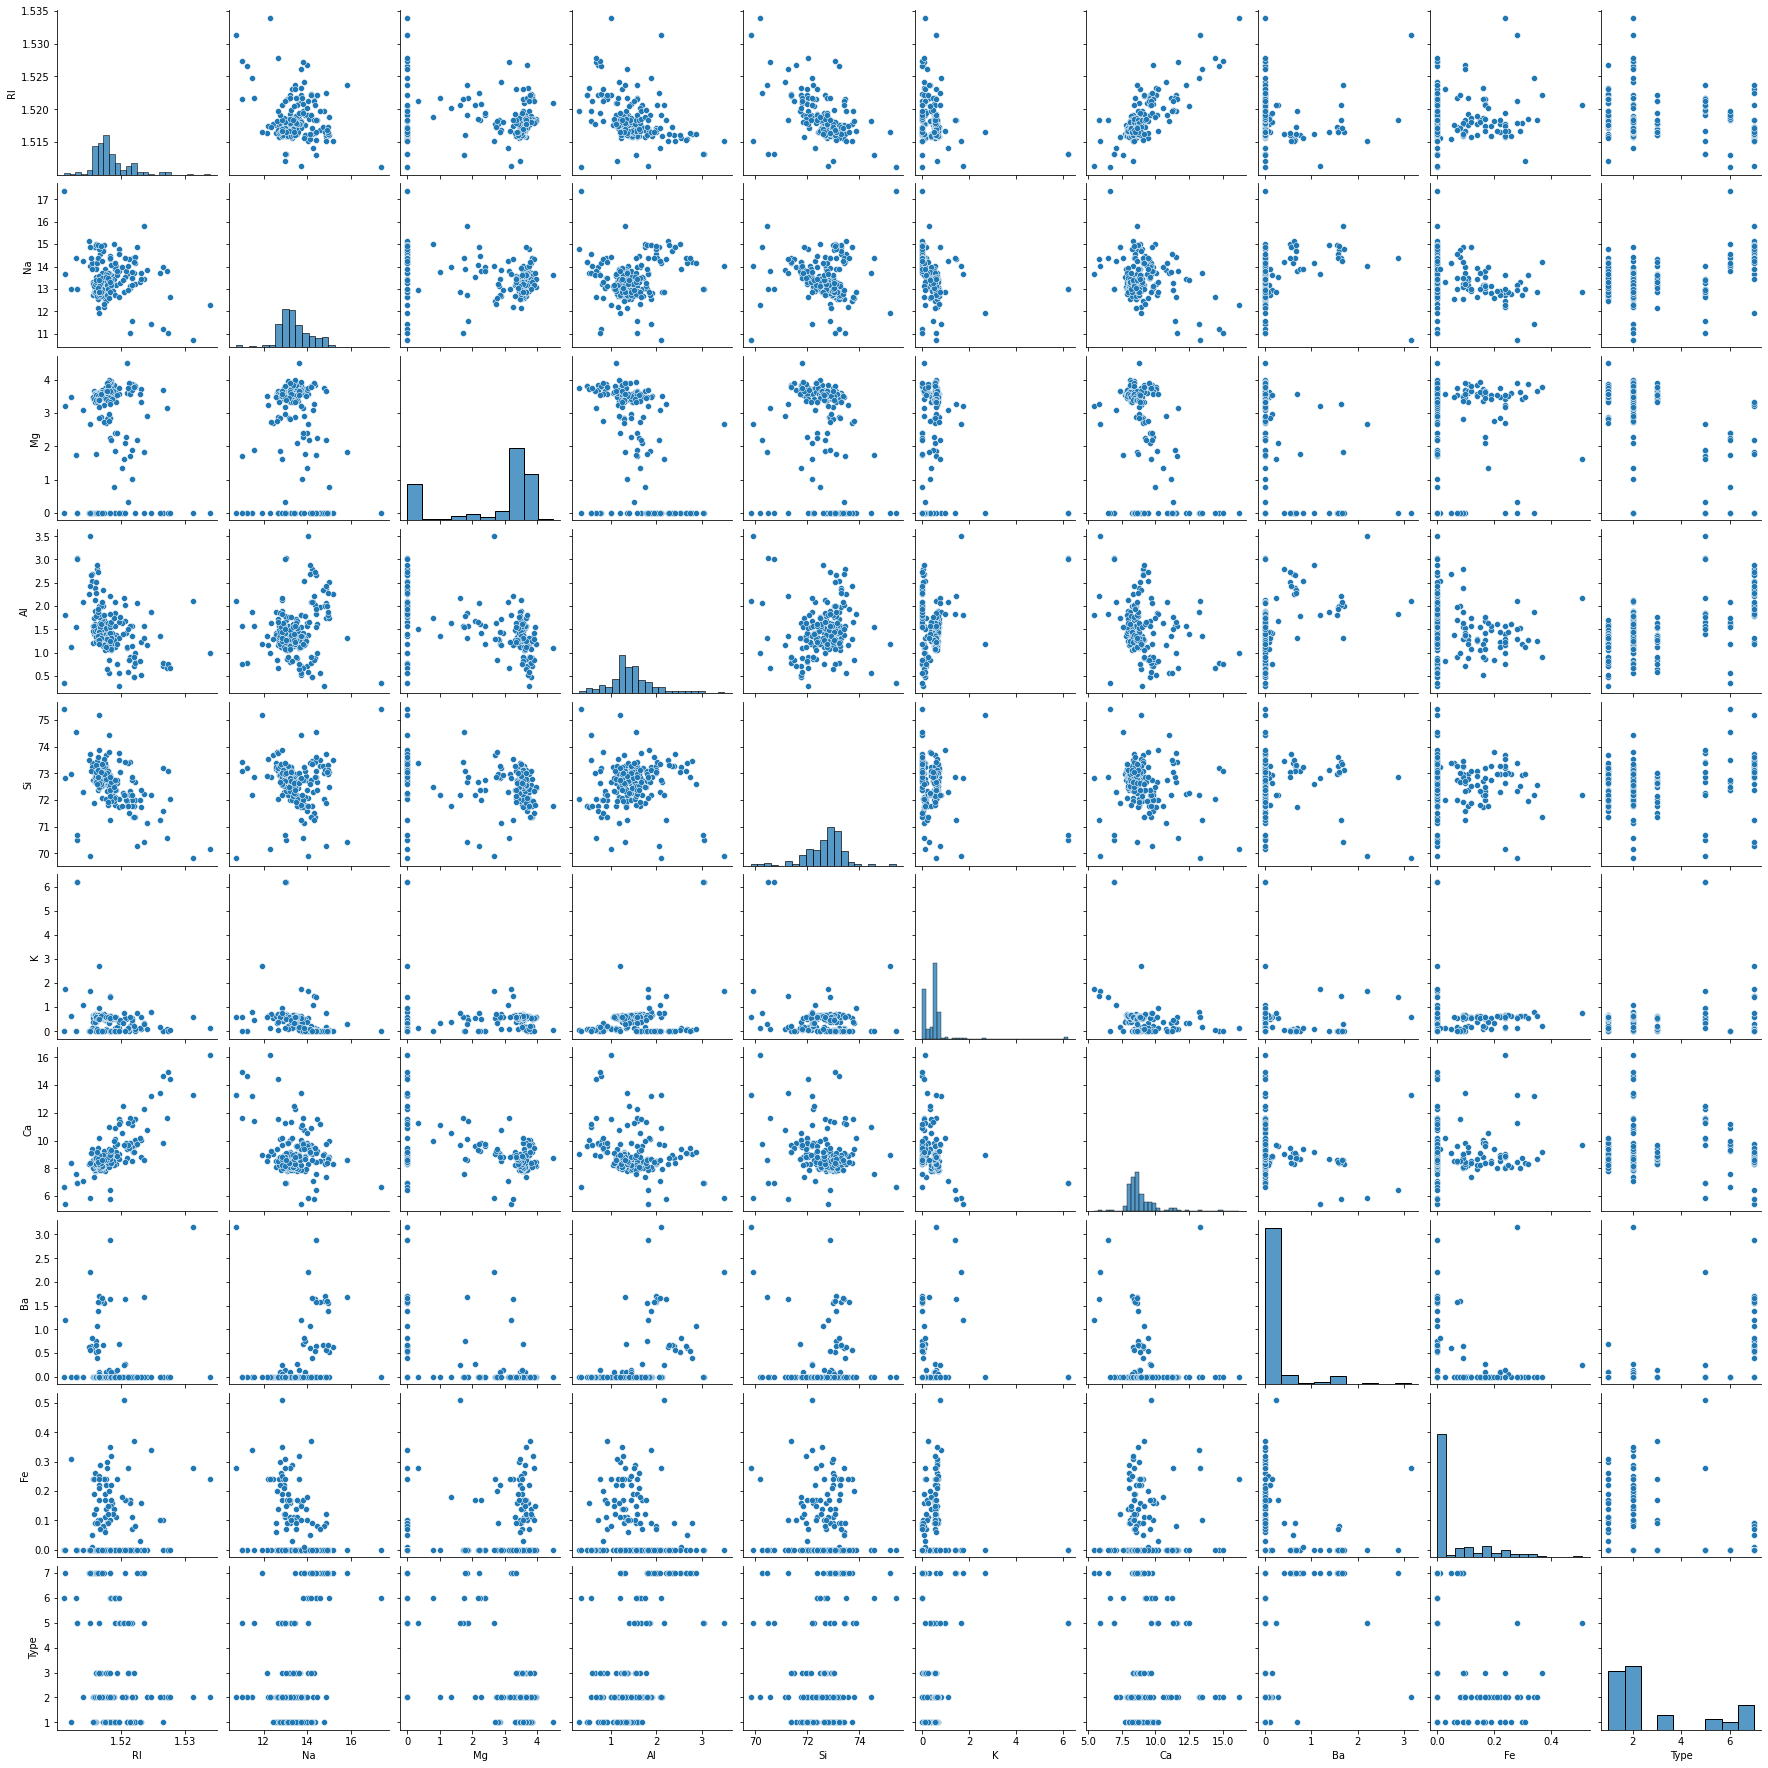

In [5]:
sns.pairplot(glass)

In [6]:
glass.shape

(214, 10)

In [7]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [9]:
## splitting the data x and  y vareiable 
x= glass.drop('Type',axis=1)
y=glass['Type']

In [10]:
## import standared scle 
from sklearn.preprocessing import StandardScaler

In [11]:
std=StandardScaler()

In [12]:
glass_std=std.fit_transform(x)

In [13]:
glass_std_df=pd.DataFrame(glass_std)

In [14]:
# spliting the data into test and train data 
x_train,x_test,y_train,y_test=train_test_split(glass_std,y,test_size=0.25,random_state=20)

In [15]:
## building the model 
knn_model=KNeighborsClassifier(n_neighbors=2)

In [16]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [17]:
### traing score 
knn_model.score(x_train,y_train)

0.85

In [18]:
## testing score 
knn_model.score(x_test,y_test)

0.6111111111111112

In [19]:
### building the mulitple models on knn 
for i in range(1,10):
    knn_m=KNeighborsClassifier(n_neighbors=i)
    knn_m.fit(x_train,y_train)
    score=knn_m.score(x_test,y_test)
    print("knn:",i,"test_score:",score)

knn: 1 test_score: 0.6481481481481481
knn: 2 test_score: 0.6111111111111112
knn: 3 test_score: 0.6296296296296297
knn: 4 test_score: 0.5925925925925926
knn: 5 test_score: 0.5740740740740741
knn: 6 test_score: 0.5925925925925926
knn: 7 test_score: 0.5925925925925926
knn: 8 test_score: 0.5925925925925926
knn: 9 test_score: 0.5555555555555556


In [40]:
import numpy as np

x = np.arange(9).reshape(3,3)[:,(0,1)]

np.info(x)

print(f'''
{x.data.contiguous = }
{x.flags.contiguous = }

{x.data.c_contiguous = }
{x.flags.c_contiguous = }

{x.data.f_contiguous = }
{x.flags.f_contiguous = }
''')

class:  ndarray
shape:  (3, 2)
strides:  (4, 12)
itemsize:  4
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x1dbe1ebcdb0
byteorder:  little
byteswap:  False
type: int32

x.data.contiguous = True
x.flags.contiguous = False

x.data.c_contiguous = False
x.flags.c_contiguous = False

x.data.f_contiguous = True
x.flags.f_contiguous = True



In [59]:
y = np.arange(9).reshape(3,3)[:,:2]

y
Out[34]: 
array([[0, 1],
       [3, 4],
       [6, 7]])

y.strides
Out[35]: (12, 4)

y.base
Out[36]: array([0, 1, 2, 3, 4, 5, 6, 7, 8])

y.flags
Out[37]: 
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

SyntaxError: invalid syntax (1535539191.py, line 4)

In [41]:
### second data 
## loading the data 
Zoo =pd.read_csv(r"C:\Users\ADMIN\assignment\assignment 13 knn.inc\Zoo.csv")
Zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


<Axes: ylabel='legs'>

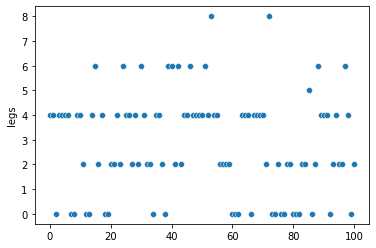

In [42]:
sns.scatterplot(Zoo.legs)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


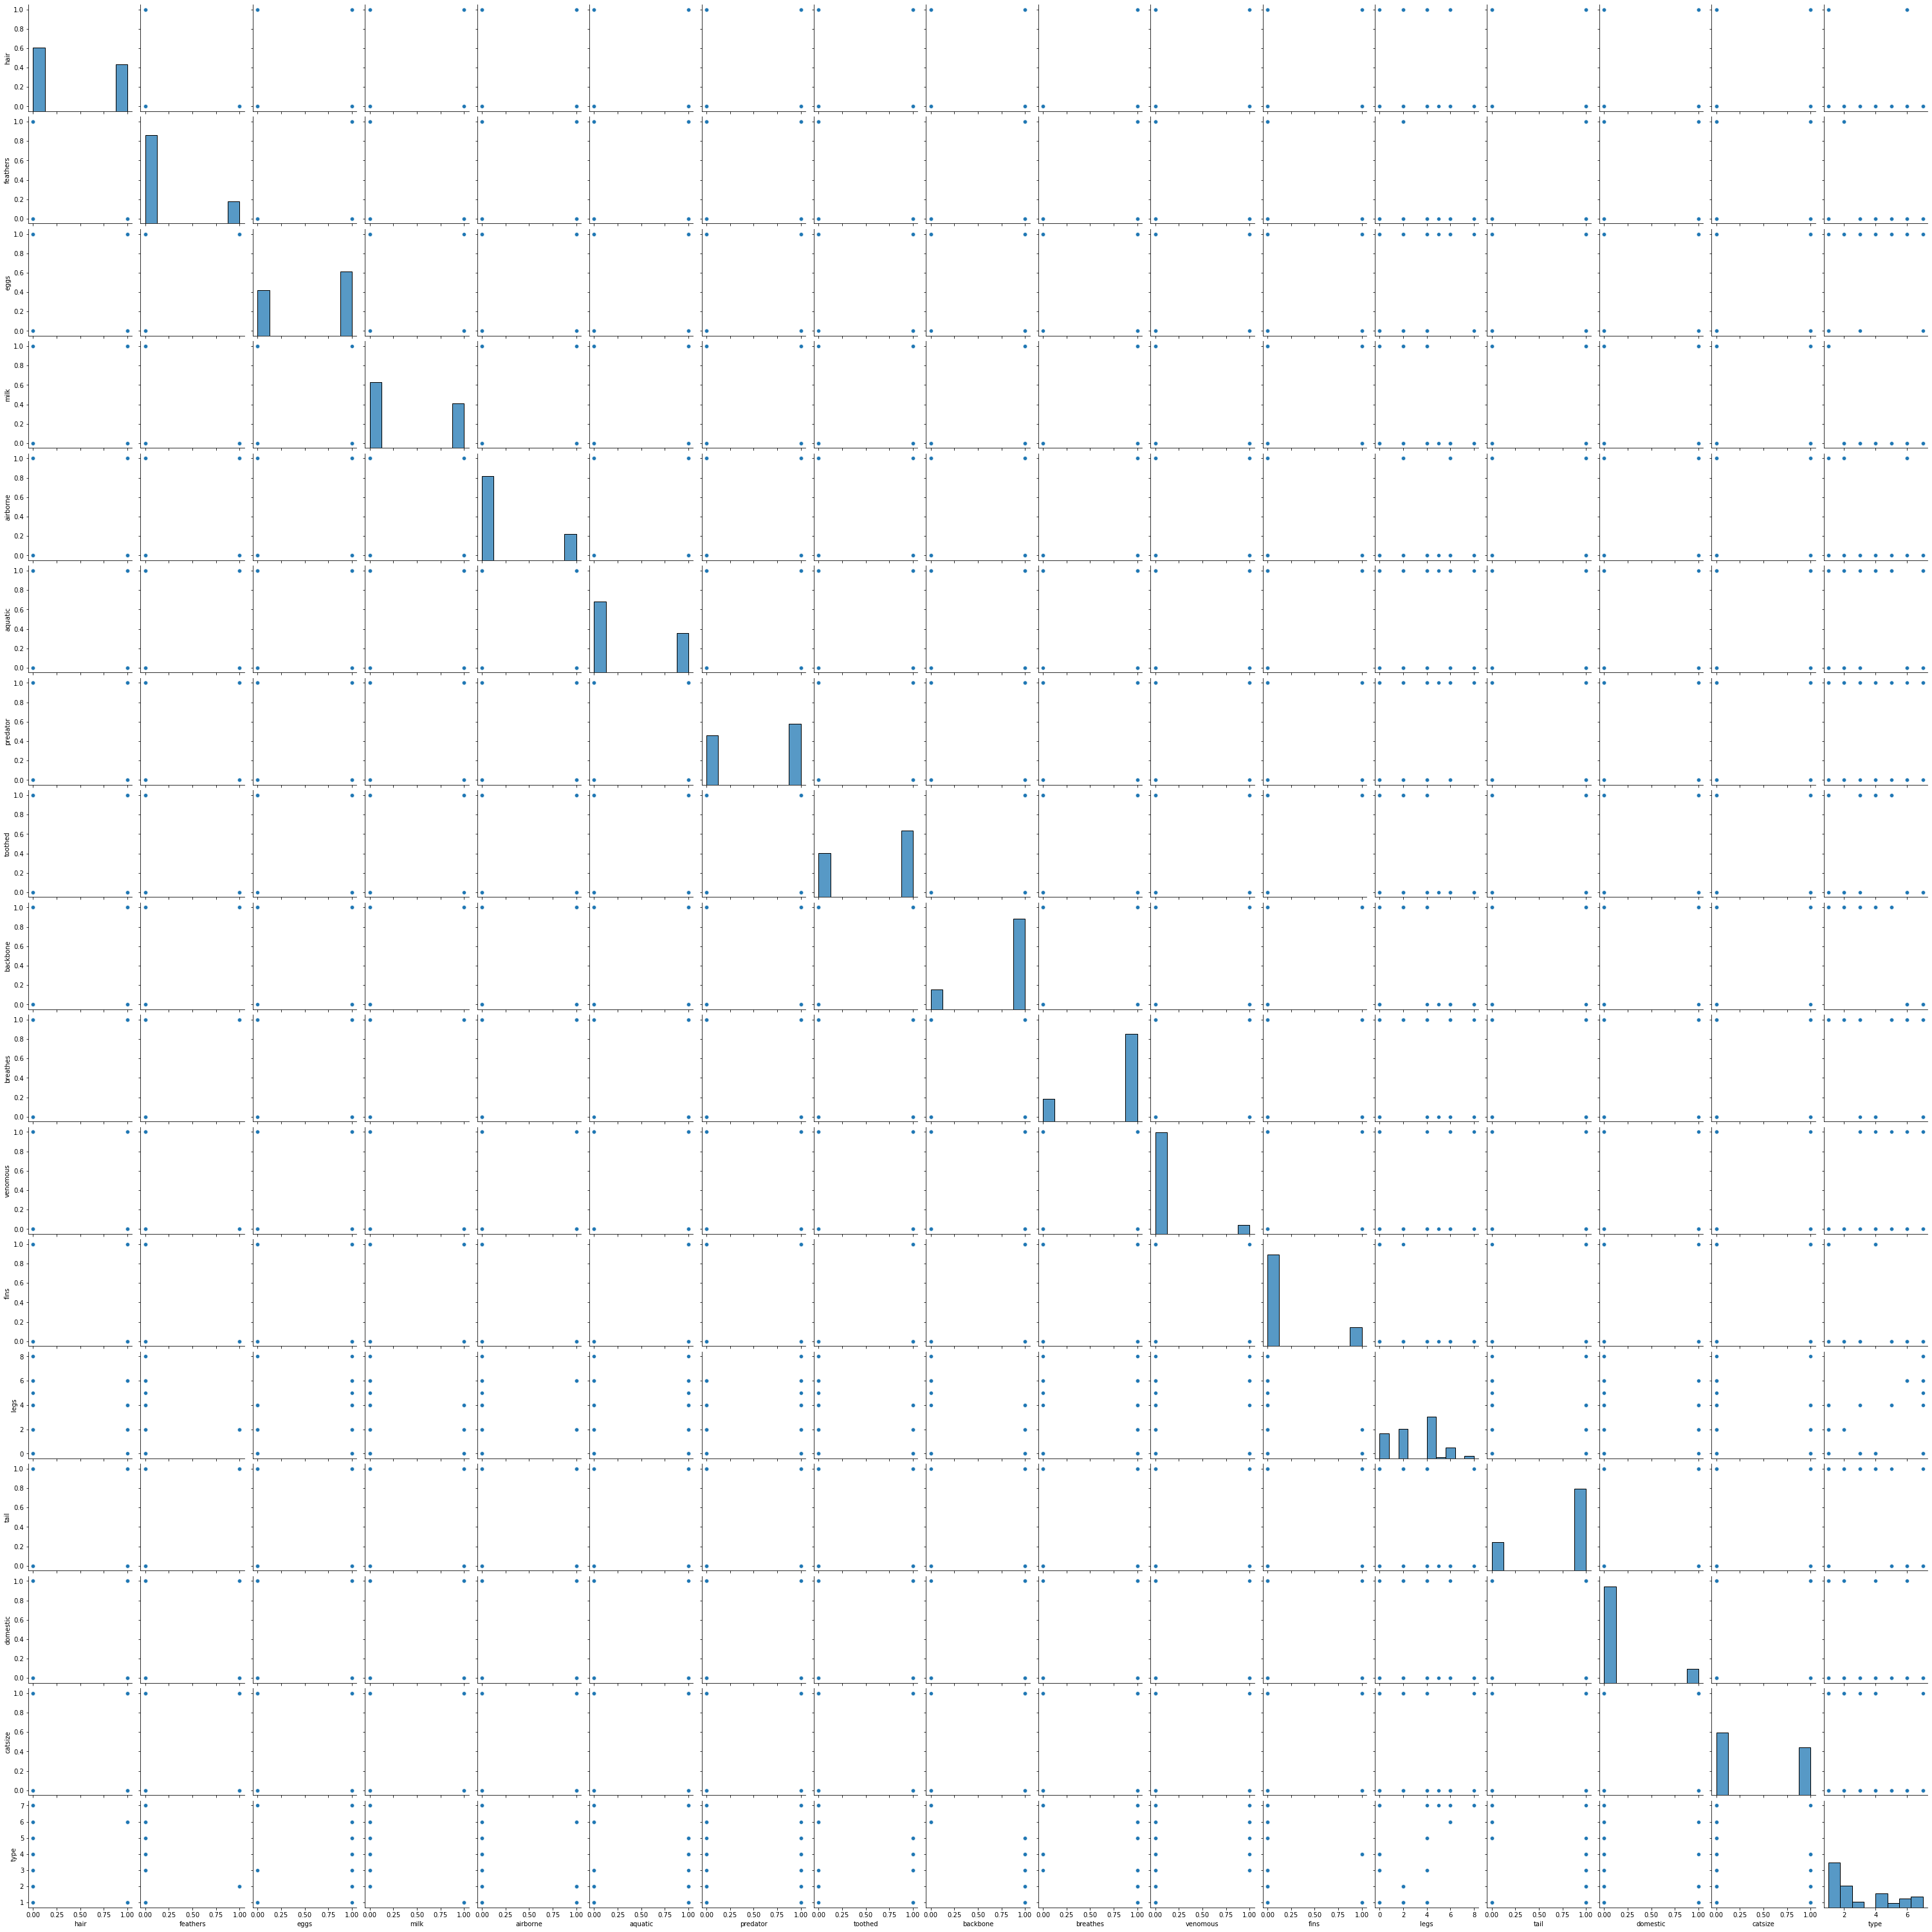

In [43]:
sns.pairplot(Zoo)

In [44]:
Zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [45]:
animal_name= Zoo[['animal name','type']]

In [46]:
animal_name['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [47]:
animal_name['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [48]:
Zoo=Zoo.drop('animal name',axis=1)

In [49]:
Zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [50]:
Zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [51]:
Zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [52]:
## spliting the data into x and y 
Zoo_x=Zoo.drop('type',axis=1)
Zoo_y=Zoo['type']

In [53]:
Zoo_x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [54]:
Zoo_y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [55]:
## splitting the data into train and test data 
x_train1,x_test1,y_train1,y_test1=train_test_split(Zoo_x,Zoo_y,test_size=0.25,random_state=20)

In [56]:
# bulding the model using defalt settings 
knn_Zoo=KNeighborsClassifier(n_neighbors=5)

In [57]:
knn_Zoo.fit(x_train1,y_train1)

KNeighborsClassifier()

In [61]:
knn_Zoo.score(x_train1.values,y_train1.values)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.92

In [62]:
knn_Zoo.score(x_test1.values, y_test1.values)



C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8846153846153846

In [64]:
## buliding the multiple model 
for i in range(1,10):
    knn_zoo_m=KNeighborsClassifier(n_neighbors=i)
    knn_zoo_m.fit(x_train1.values,y_train1.values)
    test_score=knn_zoo_m.score(x_test1.values,y_test1.values)
    train_score=knn_zoo_m.score(x_train1.values,y_train1.values)
    print("knn_value:",i,"train_score:",train_score,"test_score:",test_score)

knn_value: 1 train_score: 1.0 test_score: 0.9615384615384616
knn_value: 2 train_score: 1.0 test_score: 0.9230769230769231
knn_value: 3 train_score: 0.9733333333333334 test_score: 1.0
knn_value: 4 train_score: 0.9466666666666667 test_score: 0.9615384615384616
knn_value: 5 train_score: 0.92 test_score: 0.8846153846153846
knn_value: 6 train_score: 0.9066666666666666 test_score: 0.8461538461538461
knn_value: 7 train_score: 0.8533333333333334 test_score: 0.8076923076923077
knn_value: 8 train_score: 0.8133333333333334 test_score: 0.8076923076923077
knn_value: 9 train_score: 0.7866666666666666 test_score: 0.8076923076923077


In [65]:
### let us conceder the knn_value=3
knn_m=KNeighborsClassifier(n_neighbors=3)

In [66]:
knn_m.fit(x_train1.values,y_train1.values)

KNeighborsClassifier(n_neighbors=3)

In [68]:
y_pre=pd.DataFrame(knn_m.predict(x_test1.values))

In [69]:
y_pre

,0
0,1
1,1
2,4
3,1
4,1
5,4
6,4
7,2
8,1
9,7
